# House Princing - Advanced regression Assignment

# Steps :
    1. Data Understanding, Preparation and EDA
    2. Model Building and Evaluation

In [1]:
# Adding imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE

import statsmodels.api as sm

from scipy import stats 

# warnings hide
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

# Step 1. Data Understanding, Preparation and EDA

## 1.1 Data Understanding

In [2]:
# data import
housing_data = pd.read_csv("train.csv")
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# data info 
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Checking data shape
housing_data.shape

(1460, 81)

In [5]:
# Description of data
housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 1.2 Missing values check

In [6]:
# Check the nulls/NaN values columns
housing_data.columns[housing_data.isnull().any()] 

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [7]:
# Check null percentage in columns
null_percentage = round(100*(housing_data.isnull().sum()/len(housing_data.index)), 2)
null_groupring = null_percentage[null_percentage>0]
null_groupring.sort_values(inplace=True, ascending=False)
null_groupring

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

### Observtaions:
    1. Percentage of Null/NaN is very high(Above 80%) in Features PoolQC, MiscFeature, Alley and Fence columns. These columns will not be useful in analysis.
    2. Id column has no use in analysis as it is not providing useful information regarding data
Hence will be removing above columns

In [8]:
# Dropping Unuseful columns
housing_data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'Id'], axis=1, inplace = True)

# Shape of data
housing_data.shape

(1460, 76)

In [9]:
# As per data dictionary, the nulls values in below columns indicates the absence of capability
# Hence, imputing the categorical variables with 'None'

housing_data['FireplaceQu'] = housing_data['FireplaceQu'].fillna('None')
housing_data['MasVnrType'] = housing_data['MasVnrType'].fillna('None')
housing_data['BsmtFinType1'] = housing_data['BsmtFinType1'].fillna('None')
housing_data['BsmtFinType2'] = housing_data['BsmtFinType2'].fillna('None')
housing_data['BsmtExposure'] = housing_data['BsmtExposure'].fillna('None')
housing_data['BsmtQual'] = housing_data['BsmtQual'].fillna('None')
housing_data['BsmtCond'] = housing_data['BsmtCond'].fillna('None')
housing_data['GarageType'] = housing_data['GarageType'].fillna('None')
housing_data['GarageFinish'] = housing_data['GarageFinish'].fillna('None')
housing_data['GarageQual'] = housing_data['GarageQual'].fillna('None')
housing_data['GarageCond'] = housing_data['GarageCond'].fillna('None')

In [10]:
# # Check the nulls/NaN values columns again
housing_data.columns[housing_data.isnull().any()] 

Index(['LotFrontage', 'MasVnrArea', 'Electrical', 'GarageYrBlt'], dtype='object')

In [11]:
# Check null percentage in columns
null_percentage2 = round(100*(housing_data.isnull().sum()/len(housing_data.index)), 2)
null_groupring2 = null_percentage2[null_percentage2>0]
null_groupring2.sort_values(inplace=True, ascending=False)
null_groupring2

LotFrontage    17.74
GarageYrBlt     5.55
MasVnrArea      0.55
Electrical      0.07
dtype: float64

In [12]:
# Check LotFrontage values
housing_data['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [13]:
# Check GarageYrBlt values
housing_data['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [14]:
# Check MasVnrArea values
housing_data['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [15]:
# Check Electrical values
housing_data['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [16]:
# Check Electrical values counts
housing_data["Electrical"].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

### Observtaions:
    1. LotFrontage, GarageYrBlt, MasVnrArea are numerical features, median value can be put in null values.
    2. Electrical variable values are not numerical, median value cannot be put in null values. 
Hence it is good to drop Null values in Electrical variable

In [17]:
#Imputing median values in LotFrontage, GarageYrBlt, MasVnrArea

housing_data['LotFrontage'] = housing_data['LotFrontage'].replace(np.nan, housing_data['LotFrontage'].median())
housing_data['MasVnrArea'] = housing_data['MasVnrArea'].replace(np.nan, housing_data['MasVnrArea'].median())
housing_data['GarageYrBlt']=housing_data['GarageYrBlt'].replace(np.nan, housing_data['GarageYrBlt'].median())

In [18]:
# Dropping Electrical nulls
housing_data.dropna(subset=['Electrical'], inplace=True)
housing_data.shape

(1459, 76)

In [19]:
# Crosscheck the updated 'LotFrontage' column
housing_data['LotFrontage'].describe()

count    1459.000000
mean       69.861549
std        22.035077
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [20]:
housing_data['GarageYrBlt'].describe()

count    1459.000000
mean     1978.569568
std        23.993708
min      1900.000000
25%      1962.000000
50%      1980.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [21]:
housing_data['MasVnrArea'].describe()

count    1459.000000
mean      103.187800
std       180.773158
min         0.000000
25%         0.000000
50%         0.000000
75%       164.500000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [22]:
housing_data['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [23]:
# Check the no. of rows retained
len(housing_data.index)

1459

In [24]:
# Null check
housing_data.columns[housing_data.isnull().any()] 

Index([], dtype='object')

In [25]:
### There is no missing values left in data.

## 1.3 Remove unuseful attributes 
    that have more than 85% data associated to one value.


In [26]:
# Columns with same values( threshold 85% = (1460*85% = 1241) are not useful as skewed to one value, 
# These values can be dropped from analysis

def getColumnsWithSameValueInCategoricalVariables():
    column = []
    categoricalColumns = housing_data.select_dtypes(include=['object'])
    for col in (categoricalColumns):
        if(housing_data[col].value_counts().max() >= 1241):
            column.append(col)
    return column

categoricalColumnsNotNeeded = getColumnsWithSameValueInCategoricalVariables()
print(categoricalColumnsNotNeeded)

['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType']


In [27]:
# Remove the columns with skewed data
housing_data.drop(categoricalColumnsNotNeeded, axis = 1, inplace = True)
housing_data.shape

(1459, 58)

In [28]:
def getColumnsWithSameValueInNumericalVariables():
    column2 = []
    numericalColumns = housing_data.select_dtypes(include=['int64', 'float'])
    for col in (numericalColumns):
        if(housing_data[col].value_counts().max() >= 1241):
            column2.append(col)
    return column2

numericalColumnsNotNeeded = getColumnsWithSameValueInNumericalVariables()
print(numericalColumnsNotNeeded)

['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [29]:
# Remove the columns with skewed data
housing_data.drop(numericalColumnsNotNeeded, axis = 1, inplace = True)

housing_data.shape

(1459, 49)

## 1.4 Derived variables

In [30]:
# Create Remodelled feature - It will find whether the house has been remodelled or not

def FindRemodelled(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
housing_data['Remodelled'] = housing_data.apply(FindRemodelled, axis=1)
housing_data.head()  

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleCondition,SalePrice,Remodelled
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,None,Attchd,2003.0,RFn,2,548,0,61,2,2008,Normal,208500,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,5,2007,Normal,181500,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,9,2008,Normal,223500,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,2,2006,Abnorml,140000,1
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,12,2008,Normal,250000,0


In [31]:
# Create BuiltOrRemodelAge feature - It will find age of build or remodelled

def findBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
housing_data['BuiltOrRemodelAge'] = housing_data.apply(findBuiltOrRemodelAge, axis=1)
housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleCondition,SalePrice,Remodelled,BuiltOrRemodelAge
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,None,Attchd,2003.0,RFn,2,548,0,61,2,2008,Normal,208500,0,5
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,5,2007,Normal,181500,0,31
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,9,2008,Normal,223500,1,6
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,2,2006,Abnorml,140000,1,36
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,12,2008,Normal,250000,0,8


In [32]:
# Create GarageOldOrNew feature - It will if the Garage is old or new
# If Built year is less than 2000 - Old(0), Else New(1)

def findGarageAge(value):
    if value == 0:
        return 0
    elif value >= 1900 and value < 2000:        
        return 0
    else:   
        return 1
    
housing_data['GarageOldOrNew'] = housing_data['GarageYrBlt'].apply(findGarageAge)
housing_data.head() 

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleCondition,SalePrice,Remodelled,BuiltOrRemodelAge,GarageOldOrNew
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,None,Attchd,2003.0,RFn,2,548,0,61,2,2008,Normal,208500,0,5,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,5,2007,Normal,181500,0,31,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,9,2008,Normal,223500,1,6,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,2,2006,Abnorml,140000,1,36,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,12,2008,Normal,250000,0,8,1


In [33]:
# As derived features are created from YearBuilt, YearRemodAdd, YrSold, MoSold and GarageYrBlt, we can drop these columns

housing_data.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'MoSold', 'GarageYrBlt'], axis = 1, inplace = True)

# shape of data
housing_data.shape

(1459, 47)

## 1.5 Duplicate check

In [34]:
# Check for duplicate values in the data

housing_data[housing_data.duplicated(keep=False)]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SaleCondition,SalePrice,Remodelled,BuiltOrRemodelAge,GarageOldOrNew


### No duplicate values in data

## 1.6 Outlier Checking

In [35]:
# Checking outliers at 25%,50%,75%,90%,95% and above

housing_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,Remodelled,BuiltOrRemodelAge,GarageOldOrNew
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,56.881426,69.861549,10517.363948,6.100069,5.575737,103.187800,443.943797,567.366004,1057.891021,1162.906785,346.791638,1515.546950,0.425634,1.564770,0.382454,2.866347,6.517478,0.613434,1.766964,473.030158,94.240576,46.692255,180930.394791,0.476354,22.965045,0.274846
std,42.310746,22.035077,9984.666267,1.383171,1.113079,180.773158,456.106417,441.992392,438.500975,386.572089,436.610637,525.650927,0.518969,0.550987,0.502798,0.816050,1.625902,0.644687,0.747546,213.869604,125.381679,66.267472,79468.964025,0.499612,20.639721,0.446590
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000,0.000000
25%,20.000000,60.000000,7549.000000,5.000000,5.000000,0.000000,0.000000,223.000000,796.000000,882.000000,0.000000,1129.000000,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000,1.000000,333.000000,0.000000,0.000000,129950.000000,0.000000,4.000000,0.000000
50%,50.000000,69.000000,9477.000000,6.000000,5.000000,0.000000,384.000000,479.000000,992.000000,1088.000000,0.000000,1464.000000,0.000000,2.000000,0.000000,3.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,0.000000,14.000000,0.000000
75%,70.000000,79.000000,11603.000000,7.000000,6.000000,164.500000,712.500000,808.000000,1298.500000,1391.500000,728.000000,1777.500000,1.000000,2.000000,1.000000,3.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,1.000000,41.000000,1.000000
90%,120.000000,92.000000,14388.400000,8.000000,7.000000,335.000000,1066.000000,1232.000000,1602.400000,1680.000000,954.400000,2158.600000,1.000000,2.000000,1.000000,4.000000,9.000000,1.000000,3.000000,757.200000,262.000000,130.000000,278000.000000,1.000000,56.000000,1.000000
95%,160.000000,104.000000,17402.300000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,1831.500000,1141.100000,2466.200000,1.000000,2.000000,1.000000,4.000000,10.000000,2.000000,3.000000,850.200000,335.000000,175.100000,326200.000000,1.000000,58.000000,1.000000
99%,190.000000,137.420000,37593.680000,10.000000,9.000000,791.360000,1572.420000,1797.100000,2155.100000,2219.520000,1419.040000,3123.760000,2.000000,3.000000,1.000000,5.000000,11.000000,2.000000,3.000000,1002.980000,505.520000,285.840000,442629.620000,1.000000,60.000000,1.000000


In [36]:
# Removing Outliers

numericalColumns = list(housing_data.dtypes[housing_data.dtypes !='object'].index)
def drop_outliers(x):
    list = []
    for col in numericalColumns:
        Q1 = x[col].quantile(.02)
        Q3 = x[col].quantile(.98)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

housing_data = drop_outliers(housing_data)
housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SaleCondition,SalePrice,Remodelled,BuiltOrRemodelAge,GarageOldOrNew
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,None,Attchd,RFn,2,548,0,61,Normal,208500,0,5,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,RFn,2,460,298,0,Normal,181500,0,31,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,RFn,2,608,0,42,Normal,223500,1,6,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,Unf,3,642,0,35,Abnorml,140000,1,36,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,RFn,3,836,192,84,Normal,250000,0,8,1


In [37]:
# Check the percentage of data retained after removing outliers

num_data = round(100*(len(housing_data)/1460),2)
print(num_data)

99.38


## 1.7 Data Visualization

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

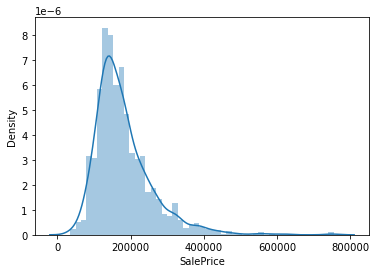

In [38]:
sns.distplot(housing_data['SalePrice'])

### Apply the log transformation to obtain a centralized data

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

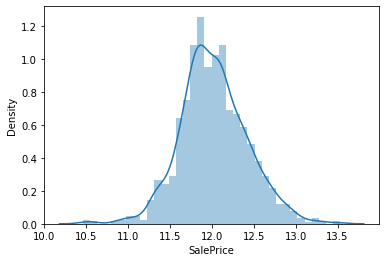

In [39]:
#Log Transformation
housing_data['SalePrice']=np.log1p(housing_data['SalePrice'])
sns.distplot(housing_data['SalePrice'])


<Figure size 720x360 with 0 Axes>

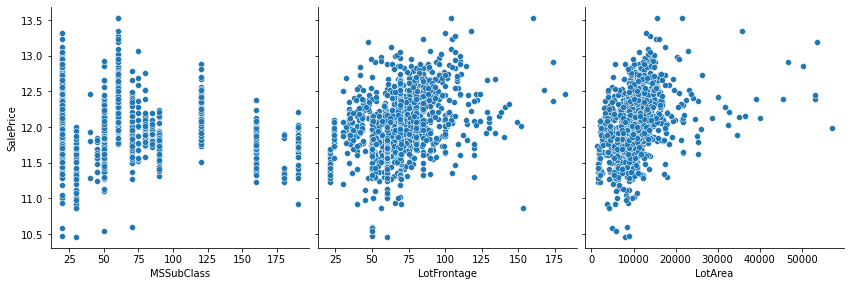

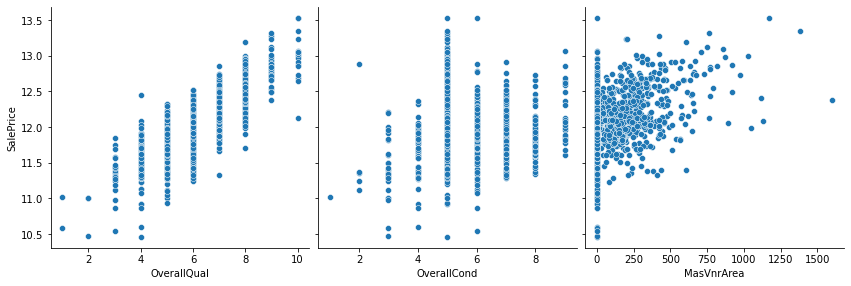

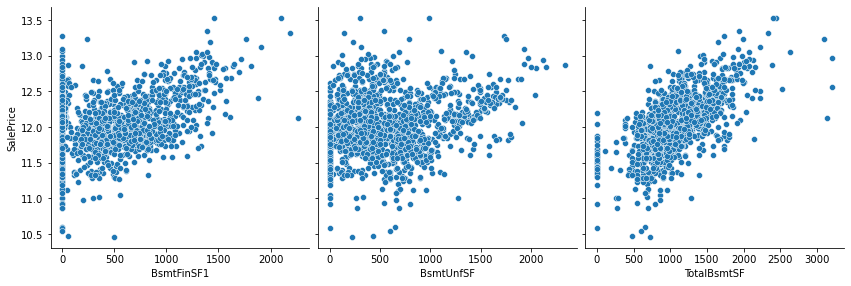

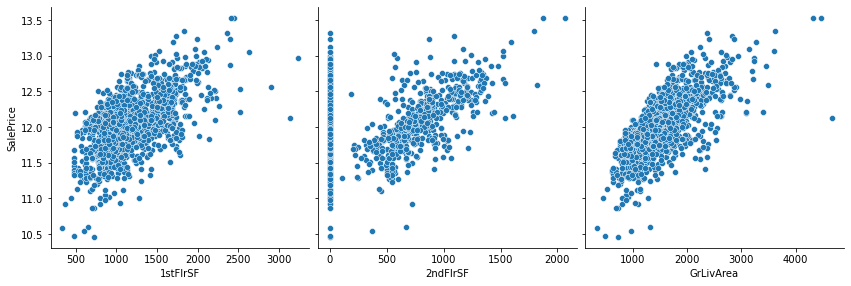

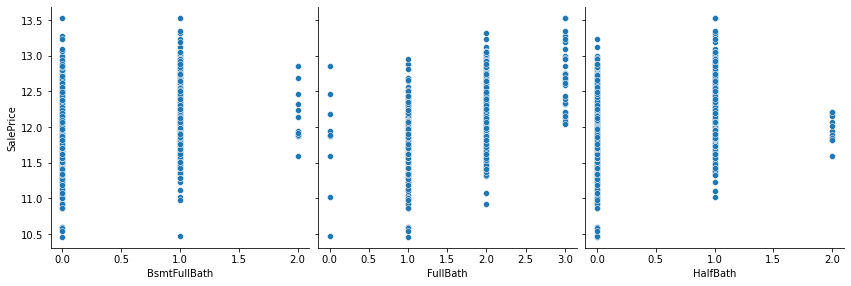

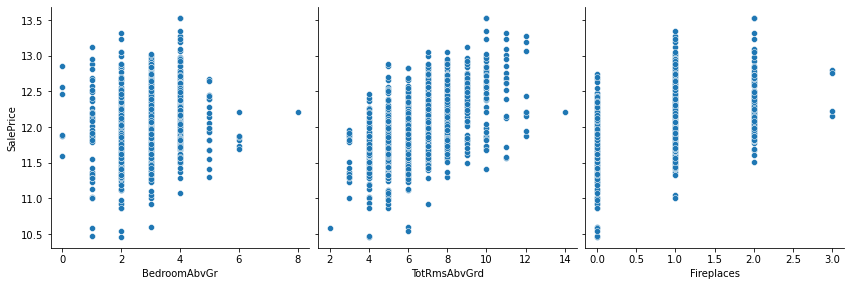

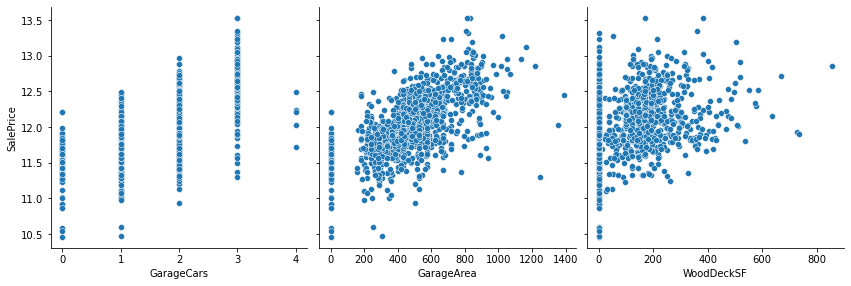

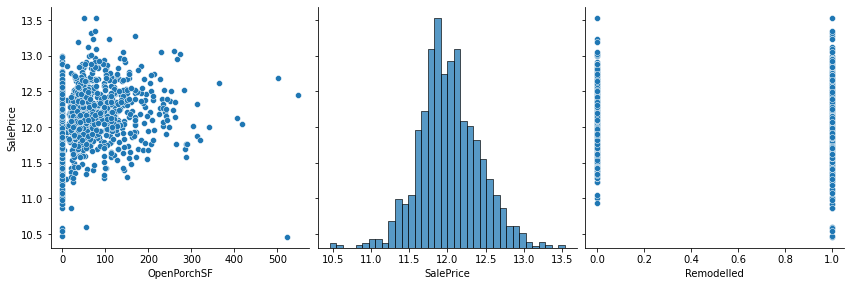

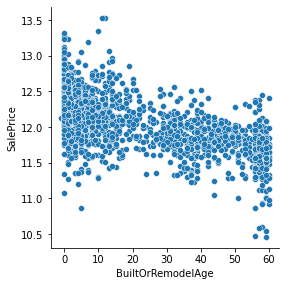

In [40]:
# Check the numerical values using pairplots

plt.figure(figsize=(10,5))
sns.pairplot(housing_data, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['OpenPorchSF','SalePrice', 'Remodelled'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['BuiltOrRemodelAge'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

## Observations :

    1stFlrSF, GrLivArea seems to be showing correlation towards right
    Rest of the variables are too scattered and hence can be understood during further analysis

In [41]:
# correlation matrix
housing_data_numeric = housing_data.select_dtypes(include=['float64', 'int64'])
corr = housing_data_numeric.corr()
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,Remodelled,BuiltOrRemodelAge,GarageOldOrNew
MSSubClass,1.000000,-0.385880,-0.286201,0.036793,-0.060050,0.025473,-0.076591,-0.139517,-0.252738,-0.260375,0.309216,0.077625,-0.001905,0.131303,0.178260,-0.024303,0.040771,-0.045913,-0.039138,-0.098322,-0.022111,-0.004855,-0.072818,-0.057628,-0.044314,0.028554
LotFrontage,-0.385880,1.000000,0.426125,0.228895,-0.063993,0.172135,0.144720,0.149510,0.324001,0.367361,0.076689,0.336060,0.059839,0.185338,0.049745,0.247886,0.311069,0.218565,0.290904,0.320246,0.084875,0.128528,0.358803,-0.036852,-0.076088,0.082792
LotArea,-0.286201,0.426125,1.000000,0.167848,-0.017730,0.145993,0.219564,0.041022,0.305286,0.386890,0.121559,0.386176,0.129268,0.164505,0.088390,0.213743,0.322809,0.305707,0.267182,0.293352,0.229742,0.155871,0.366439,0.030354,-0.035524,-0.025235
OverallQual,0.036793,0.228895,0.167848,1.000000,-0.091625,0.403901,0.229691,0.309709,0.543982,0.473984,0.295807,0.592423,0.108828,0.554412,0.274001,0.102575,0.424721,0.393537,0.602279,0.558599,0.242378,0.304073,0.821820,-0.078593,-0.553963,0.553149
OverallCond,-0.060050,-0.063993,-0.017730,-0.091625,1.000000,-0.127008,-0.043756,-0.137565,-0.175167,-0.148030,0.028750,-0.080726,-0.052720,-0.194543,-0.059691,0.010017,-0.059085,-0.024240,-0.187404,-0.151686,-0.001970,-0.032097,-0.037481,0.308893,-0.070234,-0.282705
MasVnrArea,0.025473,0.172135,0.145993,0.403901,-0.127008,1.000000,0.244859,0.113730,0.348825,0.329566,0.170345,0.377416,0.082237,0.274879,0.198691,0.102802,0.275405,0.239321,0.363711,0.364224,0.160903,0.111875,0.430920,-0.101421,-0.173612,0.156917
BsmtFinSF1,-0.076591,0.144720,0.219564,0.229691,-0.043756,0.244859,1.000000,-0.516728,0.471417,0.400536,-0.152208,0.155550,0.656070,0.049189,-0.000416,-0.114016,0.020186,0.237261,0.235564,0.279207,0.201369,0.089466,0.387551,-0.099541,-0.127303,0.020204
BsmtUnfSF,-0.139517,0.149510,0.041022,0.309709,-0.137565,0.113730,-0.516728,1.000000,0.442224,0.335466,0.002767,0.248686,-0.422364,0.294564,-0.042635,0.168568,0.254504,0.054312,0.213613,0.184596,-0.002415,0.128014,0.225507,0.028343,-0.184526,0.338938
TotalBsmtSF,-0.252738,0.324001,0.305286,0.543982,-0.175167,0.348825,0.471417,0.442224,1.000000,0.809587,-0.193053,0.421146,0.294377,0.333134,-0.057131,0.053733,0.276061,0.320581,0.456347,0.479222,0.234110,0.231271,0.642092,-0.077381,-0.302850,0.322190
1stFlrSF,-0.260375,0.367361,0.386890,0.473984,-0.148030,0.329566,0.400536,0.335466,0.809587,1.000000,-0.214872,0.542891,0.226404,0.386182,-0.126600,0.129953,0.402630,0.394636,0.452700,0.480873,0.235892,0.198438,0.612927,-0.016031,-0.243652,0.221218


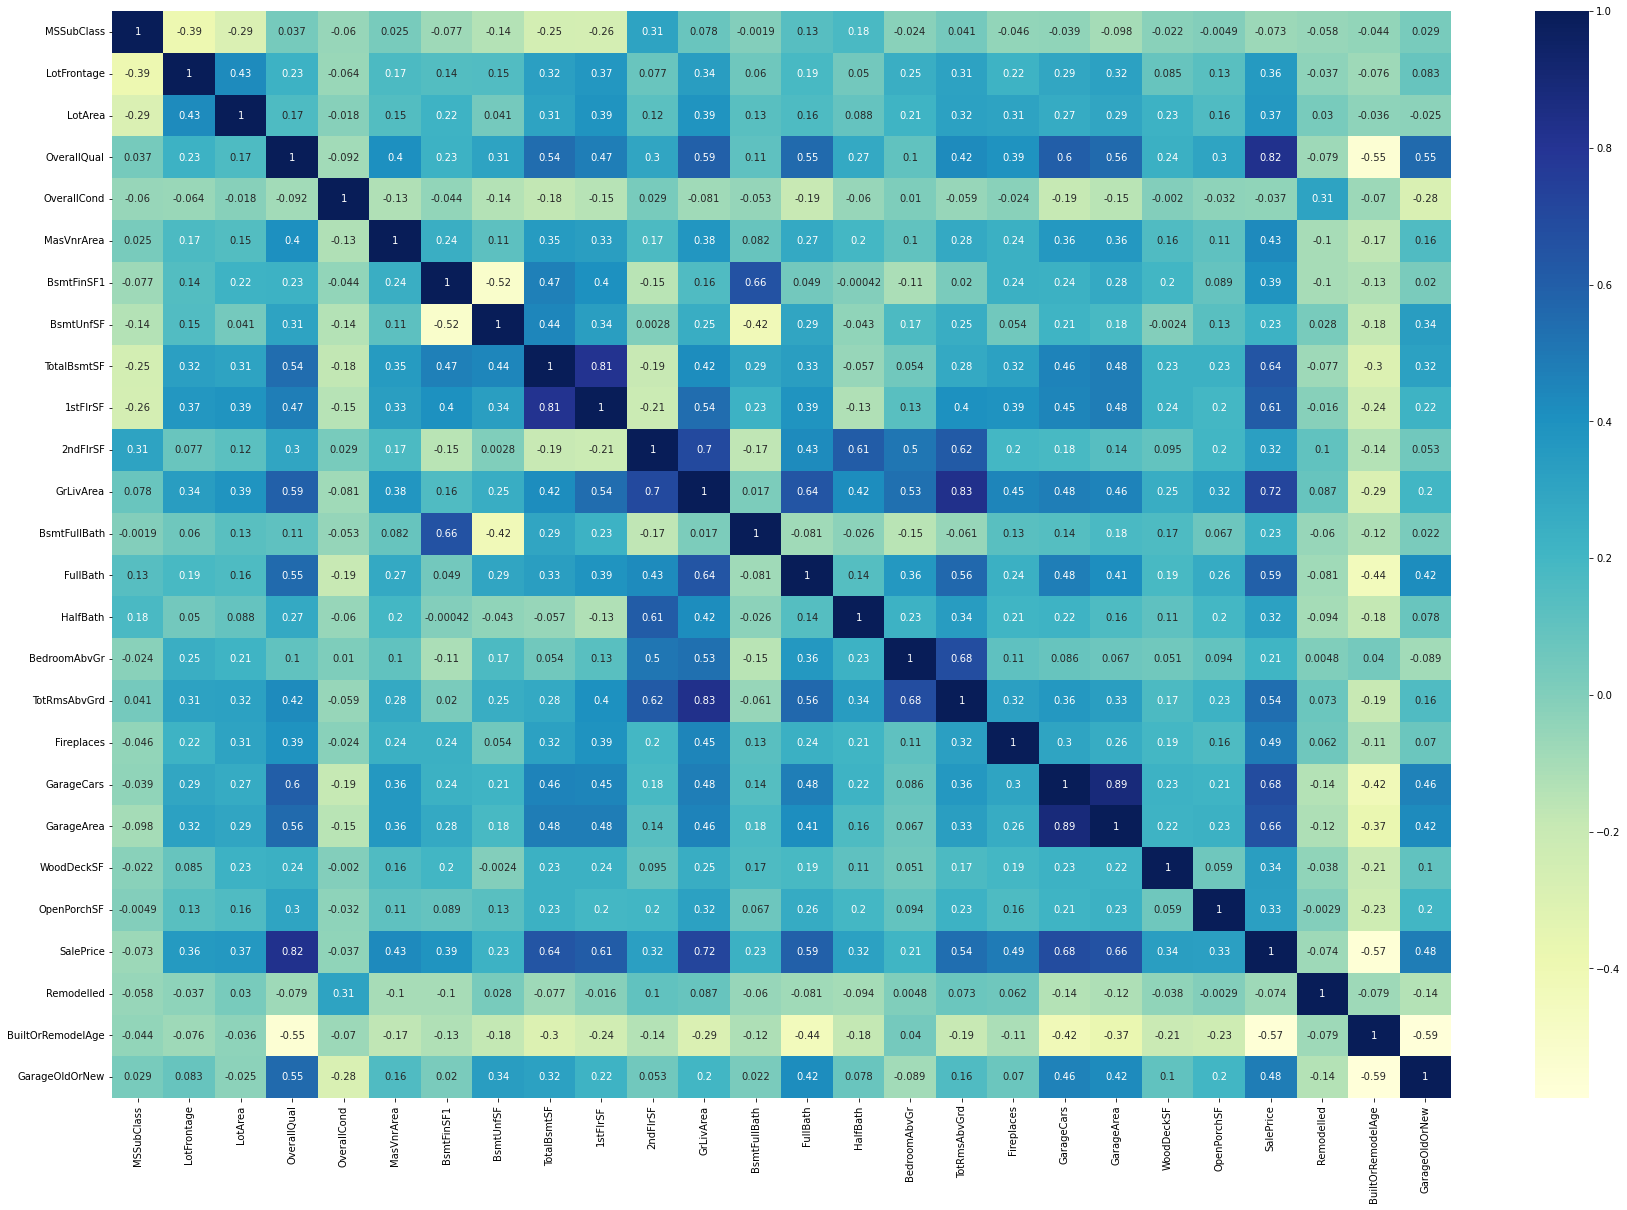

In [42]:
# correlations heatmap
plt.figure(figsize=(30,20))
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

## Following varibles are showing high correlation

    1. Garage Area and Garage Cars show 89%
    2. TotRmsAbvGrd and GrLivArea show 83%
    3. TotalBsmtSF and 1stFlrSF show  80%
Hence dropping TotRmsAbvGrd, GarageArea and TotalBsmtSF

In [43]:
# Removing the highly correlated variables
housing_data.drop(['TotRmsAbvGrd', 'GarageArea', 'TotalBsmtSF'], axis = 1, inplace = True)

print(housing_data.shape)

(1451, 44)


## 1.8: Data Preparation

In [44]:
# Since the values of the following fields are ordered list, we shall assign values to them in sequence

# For values which can be ordered, we have given an ordered sequence value
# For values which cannot be ordered, we have categorised them into 0 and 1

housing_data['d_LotShape'] = housing_data['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
housing_data['d_ExterQual'] = housing_data['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
housing_data['d_BsmtQual'] = housing_data['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_data['d_BsmtExposure'] = housing_data['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
housing_data['d_BsmtFinType1'] = housing_data['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
housing_data['d_HeatingQC'] = housing_data['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_data['d_KitchenQual'] = housing_data['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_data['d_FireplaceQu'] = housing_data['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_data['d_GarageFinish'] = housing_data['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
housing_data['d_BldgType'] = housing_data['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
housing_data['d_HouseStyle'] = housing_data['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
housing_data['d_LotConfig'] = housing_data['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
housing_data['d_MasVnrType'] = housing_data['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
housing_data['d_SaleCondition'] = housing_data['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,SaleCondition,SalePrice,Remodelled,BuiltOrRemodelAge,GarageOldOrNew,d_LotShape,d_ExterQual,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,Ex,856,854,1710,1,2,1,3,Gd,0,None,Attchd,RFn,2,0,61,Normal,12.247699,0,5,1,3,4,4,1,6,5,4,0,2,1,4,5,1,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,Ex,1262,0,1262,0,2,0,3,TA,1,TA,Attchd,RFn,2,298,0,Normal,12.109016,0,31,0,3,3,4,4,5,5,3,3,2,1,1,2,0,1
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,Ex,920,866,1786,1,2,1,3,Gd,1,TA,Attchd,RFn,2,0,42,Normal,12.317171,1,6,1,2,4,4,2,6,5,4,3,2,1,4,5,1,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,Gd,961,756,1717,1,1,0,3,Gd,1,Gd,Detchd,Unf,3,0,35,Abnorml,11.849405,1,36,0,2,3,3,1,5,4,4,4,1,1,4,4,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,Ex,1145,1053,2198,1,2,1,4,Gd,1,TA,Attchd,RFn,3,192,84,Normal,12.429220,0,8,1,2,4,4,3,6,5,4,3,2,1,4,2,1,1


In [45]:
# drop the old columns from which the new columns were derived

housing_data = housing_data.drop(['LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,Foundation,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageType,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,Remodelled,BuiltOrRemodelAge,GarageOldOrNew,d_LotShape,d_ExterQual,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,196.0,PConc,706,150,856,854,1710,1,2,1,3,0,Attchd,2,0,61,12.247699,0,5,1,3,4,4,1,6,5,4,0,2,1,4,5,1,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,0.0,CBlock,978,284,1262,0,1262,0,2,0,3,1,Attchd,2,298,0,12.109016,0,31,0,3,3,4,4,5,5,3,3,2,1,1,2,0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,162.0,PConc,486,434,920,866,1786,1,2,1,3,1,Attchd,2,0,42,12.317171,1,6,1,2,4,4,2,6,5,4,3,2,1,4,5,1,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,0.0,BrkTil,216,540,961,756,1717,1,1,0,3,1,Detchd,3,0,35,11.849405,1,36,0,2,3,3,1,5,4,4,4,1,1,4,4,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,350.0,PConc,655,490,1145,1053,2198,1,2,1,4,1,Attchd,3,192,84,12.429220,0,8,1,2,4,4,3,6,5,4,3,2,1,4,2,1,1


In [46]:
# For the following columns create dummies

# Creating dummies for MSZoning

d_MSZoning = pd.get_dummies(housing_data['MSZoning'], prefix='MSZoning', drop_first = True)
housing_data = pd.concat([housing_data, d_MSZoning], axis = 1)

# Creating dummies for Neighborhood

d_Neighborhood = pd.get_dummies(housing_data['Neighborhood'], prefix='Neighborhood', drop_first = True)
housing_data = pd.concat([housing_data, d_Neighborhood], axis = 1)

# Creating dummies for RoofStyle

d_RoofStyle = pd.get_dummies(housing_data['RoofStyle'], prefix='RoofStyle', drop_first = True)
housing_data = pd.concat([housing_data, d_RoofStyle], axis = 1)

# Creating dummies for Exterior1st

d_Exterior1st = pd.get_dummies(housing_data['Exterior1st'], prefix='Exterior1st', drop_first = True)
housing_data = pd.concat([housing_data, d_Exterior1st], axis = 1)

# Creating dummies for Exterior2nd

d_Exterior2nd = pd.get_dummies(housing_data['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
housing_data = pd.concat([housing_data, d_Exterior2nd], axis = 1)

# Creating dummies for Foundation

d_Foundation = pd.get_dummies(housing_data['Foundation'], prefix='Foundation', drop_first = True)
housing_data = pd.concat([housing_data, d_Foundation], axis = 1)

# Creating dummies for GarageType

d_GarageType = pd.get_dummies(housing_data['GarageType'], prefix='GarageType', drop_first = True)
housing_data = pd.concat([housing_data, d_GarageType], axis = 1)

housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,Foundation,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageType,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,Remodelled,BuiltOrRemodelAge,GarageOldOrNew,d_LotShape,d_ExterQual,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_LotConfig,d_MasVnrType,d_SaleCondition,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,...,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,196.0,PConc,706,150,856,854,1710,1,2,1,3,0,Attchd,2,0,61,12.247699,0,5,1,3,4,4,1,6,5,4,0,2,1,4,5,1,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,0.0,CBlock,978,284,1262,0,1262,0,2,0,3,1,Attchd,2,298,0,12.109016,0,31,0,3,3,4,4,5,5,3,3,2,1,1,2,0,1,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,162.0,PConc,486,434,920,866,1786,1,2,1,3,1,Attchd,2,0,42,12.317171,1,6,1,2,4,4,2,6,5,4,3,2,1,4,5,1,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,0.0,BrkTil,216,540,961,756,1717,1,1,0,3,1,Detchd,3,0,35,11.849405,1,36,0,2,3,3,1,5,4,4,4,1,1,4,4,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,350.0,PConc,655,490,1145,1053,2198,1,2,1,4,1,Attchd,3,192,84,12.429220,0,8,1,2,4,4,3,6,5,4,3,2,1,4,2,1,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [47]:
# drop the below columns as we now have new columns derived from these columns

housing_data = housing_data.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)

housing_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,Remodelled,BuiltOrRemodelAge,GarageOldOrNew,d_LotShape,d_ExterQual,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_LotConfig,d_MasVnrType,d_SaleCondition,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,...,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,854,1710,1,2,1,3,0,2,0,61,12.247699,0,5,1,3,4,4,1,6,5,4,0,2,1,4,5,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,0,1262,0,2,0,3,1,2,298,0,12.109016,0,31,0,3,3,4,4,5,5,3,3,2,1,1,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,866,1786,1,2,1,3,1,2,0,42,12.317171,1,6,1,2,4,4,2,6,5,4,3,2,1,4,5,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,961,756,1717,1,1,0,3,1,3,0,35,11.849405,1,36,0,2,3,3,1,5,4,4,4,1,1,4,4,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1053,2198,1,2,1,4,1,3,192,84,12.429220,0,8,1,2,4,4,3,6,5,4,3,2,1,4,2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [48]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Columns: 110 entries, MSSubClass to GarageType_None
dtypes: float64(3), int64(34), uint8(73)
memory usage: 534.2 KB


### All columns in the data set are now numeric.

In [49]:
housing_data.shape

(1451, 110)

# Step 2:Model Building and Evaluation

## 2.1 Train Test Split

In [50]:
# Putting all feature variable to X

X = housing_data.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,Remodelled,BuiltOrRemodelAge,GarageOldOrNew,d_LotShape,d_ExterQual,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_LotConfig,d_MasVnrType,d_SaleCondition,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,...,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,854,1710,1,2,1,3,0,2,0,61,0,5,1,3,4,4,1,6,5,4,0,2,1,4,5,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,0,1262,0,2,0,3,1,2,298,0,0,31,0,3,3,4,4,5,5,3,3,2,1,1,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,866,1786,1,2,1,3,1,2,0,42,1,6,1,2,4,4,2,6,5,4,3,2,1,4,5,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,961,756,1717,1,1,0,3,1,3,0,35,1,36,0,2,3,3,1,5,4,4,4,1,1,4,4,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1053,2198,1,2,1,4,1,3,192,84,0,8,1,2,4,4,3,6,5,4,3,2,1,4,2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [51]:
# Putting response variable to y

y = housing_data['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [52]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

### Scaling the features

In [53]:
scaler = MinMaxScaler()
X_train_1 = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_1, columns = X_train.columns)

X_test_1 = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_1, columns = X_test.columns)

In [54]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,Remodelled,BuiltOrRemodelAge,GarageOldOrNew,d_LotShape,d_ExterQual,d_BsmtQual,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_LotConfig,d_MasVnrType,d_SaleCondition,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,...,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
count,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,...,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.0,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.0,1015.000000,1015.000000,1015.000000,1015.000000,1015.0,1015.000000,1015.000000,1015.000000,1015.000000,1015.00000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.0,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000
mean,0.210548,0.297029,0.164907,0.566065,0.573030,0.075141,0.191966,0.243867,0.283891,0.165487,0.269093,0.210345,0.518555,0.190148,0.473892,0.202299,0.438916,0.125758,0.086332,0.486700,0.391698,0.276847,0.864368,0.466010,0.692808,0.401478,0.584565,0.784975,0.507061,0.367488,0.571100,0.112562,0.230401,0.896059,0.399015,0.903448,0.046305,0.007882,0.786207,0.153695,0.001970,0.007882,0.041379,0.015764,0.102463,0.029557,0.070936,0.052217,0.029557,0.014778,...,0.040394,0.058128,0.016749,0.026601,0.007882,0.780296,0.008867,0.198030,0.004926,0.001970,0.000985,0.000985,0.033498,0.0,0.043350,0.151724,0.000985,0.157635,0.065025,0.000985,0.015764,0.356650,0.142857,0.016749,0.000985,0.003941,0.021675,0.0,0.042365,0.136946,0.008867,0.155665,0.0,0.089655,0.001970,0.014778,0.349754,0.13399,0.027586,0.431527,0.448276,0.019704,0.003941,0.0,0.582266,0.011823,0.065025,0.007882,0.269951,0.060099
std,0.243048,0.124576,0.096486,0.154672,0.140581,0.130719,0.192979,0.187305,0.130562,0.211153,0.119375,0.256746,0.185079,0.251821,0.133860,0.210442,0.189630,0.164174,0.124682,0.500069,0.340687,0.447661,0.191580,0.190503,0.179462,0.264189,0.351560,0.239696,0.221389,0.362774,0.299677

In [55]:
y_train.describe()

count    1015.000000
mean       12.014892
std         0.409747
min        10.460271
25%        11.767575
50%        11.989166
75%        12.272543
max        13.534474
Name: SalePrice, dtype: float64

### Simple LR 

In [56]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [57]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

10.11937070021904
[-5.85356749e-02  2.04712016e-02  1.56029652e-01  4.87443759e-01
  3.44042990e-01 -8.44525695e-03  1.62147334e-01  4.93860679e-02
  5.21561136e-01  2.51366788e-01  2.88193859e-01  5.47221669e-02
  8.45931241e-02  5.92267393e-02  1.03819884e-01  5.01644630e-02
  1.93559265e-01  4.73988193e-02  1.02349662e-02 -3.09280759e-02
 -5.50613391e-02  2.52576329e-02  1.79608244e-02 -1.47755495e-02
  1.31032854e-01  5.98651982e-02  3.71532857e-02  4.07336201e-02
  6.55164071e-02  3.37531179e-02  5.07224953e-02 -5.70994551e-02
  5.75780898e-03 -2.50955802e-02  1.25018936e-02  5.83949015e-02
  5.15361492e-01  6.32524201e-01  4.94439944e-01  4.46022286e-01
 -1.72218485e-01 -1.29924171e-01 -5.34386569e-02 -4.92968235e-02
 -4.06789686e-02  3.71308764e-02 -1.48157209e-01 -6.32631367e-02
 -8.23549056e-02 -1.26989911e-01 -1.00816228e-01 -9.93077650e-02
 -5.48452748e-02 -9.73426626e-02  6.63753861e-02  7.81179210e-02
 -1.33045557e-01 -1.32493384e-01 -1.27374472e-01 -5.17746304e-02
  1.000

In [58]:
y_pred_train = lm.predict(X_train)

In [59]:
r2_score(y_train,y_pred_train)

0.9248783432231765

### This mean, that the features explain ~92% of variations in target variable

#### Plot for SalePrice and OverallQual(.82 corr)

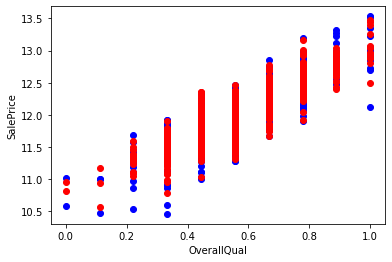

In [60]:
plt.scatter(X_train['OverallQual'], y_train, color='blue')
plt.scatter(X_train['OverallQual'], y_pred_train, color = 'red')
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.show()

#### Plot for SalePrice and GrLivArea(.77 corr)

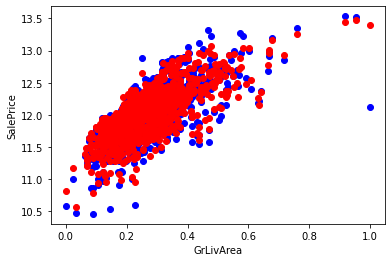

In [61]:
plt.scatter(X_train['GrLivArea'], y_train, color='blue')
plt.scatter(X_train['GrLivArea'], y_pred_train, color = 'red')
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

In [62]:
y_res = y_train - y_pred_train

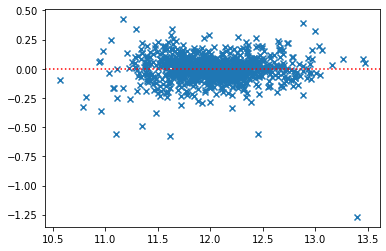

In [63]:
plt.scatter(y_pred_train,y_res, marker='x')
plt.axhline(y=0,color ='r', linestyle =':')
plt.show()

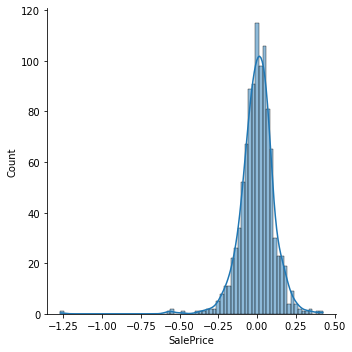

In [64]:
sns.displot(y_res,kde=True)
plt.show()

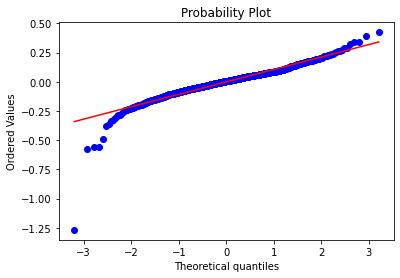

In [65]:
fig = plt.figure()
res = stats.probplot(y_res, plot=plt)

In [66]:
y_pred_test = lm.predict(X_test)


In [67]:
r2_score(y_test,y_pred_test)

-5.060041322868393e+24

In [68]:
metric1 = []
r2_train = metrics.r2_score(y_train, y_pred_train)
print(r2_train)
metric1.append(r2_train)

r2_test = metrics.r2_score(y_test, y_pred_test)
print(r2_test)
metric1.append(r2_test)

rss1_train = np.sum(np.square(y_train - y_pred_train))
print(rss1_train)
metric1.append(rss1_train)

rss2_train = np.sum(np.square(y_test - y_pred_test))
print(rss2_train)
metric1.append(rss2_train)

mse_train = metrics.mean_squared_error(y_train, y_pred_train)
print(mse_train)
metric1.append(mse_train**0.5)

mse_test = metrics.mean_squared_error(y_test, y_pred_test)
print(mse_test)
metric1.append(mse_test**0.5)

rmse_train = np.sqrt(mse_train)
print(rmse_train)
metric1.append(rmse_train)

rmse_test = np.sqrt(mse_test)
print(rmse_test)
metric1.append(rmse_test)

0.9248783432231765
-5.060041322868393e+24
12.788960673707425
3.066353811879126e+26
0.012599961254884162
7.03292158687873e+23
0.11224954901862262
838625159822.8335


In [69]:
y_res1 = y_test- y_pred_test

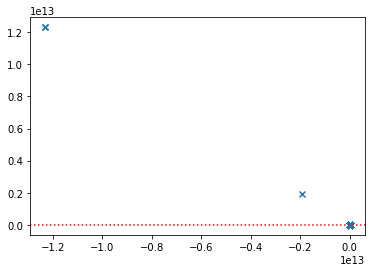

In [70]:
plt.scatter(y_pred_test,y_res1, marker='x')
plt.axhline(y=0,color ='r', linestyle =':')
plt.show()

### This is an overfitting as r2_score for test is negative 

# RFE method

In [71]:
 # running RFE for top 50 variables
lm= LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 50)            
rfe = rfe.fit(X_train, y_train)

In [72]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,MSSubClass,True,1
1,LotArea,True,1
2,OverallQual,True,1
3,OverallCond,True,1
4,BsmtFinSF1,True,1
5,1stFlrSF,True,1
6,2ndFlrSF,True,1
7,FullBath,True,1
8,HalfBath,True,1
9,BedroomAbvGr,True,1


In [73]:
top = X_train.columns[rfe.support_]
top

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       '1stFlrSF', '2ndFlrSF', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'Fireplaces', 'GarageCars', 'BuiltOrRemodelAge', 'd_BsmtQual',
       'd_BsmtExposure', 'd_BsmtFinType1', 'd_HeatingQC', 'd_KitchenQual',
       'd_GarageFinish', 'd_SaleCondition', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'RoofStyle_Gable', 'RoofStyle_Hip', 'RoofStyle_Mansard',
       'RoofStyle_Shed', 'Exterior1st_BrkComm', 'Exterior1st_CemntBd',
       'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior1st_Wd Sdng',
       'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd',
       'Exterior2nd_ImStucc', 'Exterior2nd_Wd Sdng', '

In [74]:
X_train_rfe = X_train[top]
X_test_rfe = X_test[top]

In [75]:
lm1 = lm.fit(X_train_rfe,y_train)
print(lm1.intercept_)
print(lm1.coef_)

10.088631571222185
[-0.09962276  0.17571582  0.54428093  0.28550332  0.14263886  0.75893922
  0.37022353  0.08515384  0.06173919  0.13605552  0.09753524  0.20334472
 -0.05055283  0.1313301   0.09127764  0.05203221  0.06137557  0.08360361
  0.06762564  0.06736633  0.53266296  0.60040599  0.51787358  0.44331883
  0.09101758 -0.07753852  0.09122032  0.11658915 -0.05711876 -0.06003872
 -0.04683459  0.07132727  0.19864912  0.08601873  0.05910873  0.06669171
  0.0770522   0.09731202 -0.51201916 -0.10236165 -0.08801235 -0.0813299
 -0.06372276  0.04236522  0.02404378  0.05771322  0.04145679  0.05143439
  0.04531092 -0.05041702]


In [76]:
y_pred_rfe_train = lm1.predict(X_train_rfe)
y_pred_rfe_test = lm1.predict(X_test_rfe)

In [77]:
rfe_cols = pd.DataFrame(index=X_test_rfe.columns)

rfe_cols.rows = X_test.columns

rfe_cols['Coef_Values'] = lm1.coef_

rfe_best_cols = rfe_cols[~(rfe_cols['Coef_Values']==0)]
rfe_best_cols.sort_values(by = 'Coef_Values', ascending=False ,inplace=True)
rfe_best_cols.head(10)

,Coef_Values
1stFlrSF,0.758939
MSZoning_RH,0.600406
OverallQual,0.544281
MSZoning_FV,0.532663
MSZoning_RL,0.517874
MSZoning_RM,0.443319
2ndFlrSF,0.370224
OverallCond,0.285503
GarageCars,0.203345
Neighborhood_StoneBr,0.198649


In [78]:
metric2 = []
r2_rfe_train = metrics.r2_score(y_train, y_pred_rfe_train)
print(r2_rfe_train)
metric2.append(r2_rfe_train)

r2_rfe_test = metrics.r2_score(y_test, y_pred_rfe_test)
print(r2_rfe_test)
metric2.append(r2_rfe_test)

rss_rfe_train = np.sum(np.square(y_train - y_pred_rfe_train))
print(rss_rfe_train)
metric2.append(rss_rfe_train)

rss_rfe_test = np.sum(np.square(y_test - y_pred_rfe_test))
print(rss_rfe_test)
metric2.append(rss_rfe_test)

mse_rfe_train = metrics.mean_squared_error(y_train, y_pred_rfe_train)
print(mse_rfe_train)
metric2.append(mse_rfe_train**0.5)

mse_rfe_test = metrics.mean_squared_error(y_test, y_pred_rfe_test)
print(mse_rfe_test)
metric2.append(mse_rfe_test**0.5)

rmse_rfe_train = np.sqrt(mse_rfe_train)
print(rmse_rfe_train)
metric2.append(rmse_rfe_train)

rmse_rfe_test = np.sqrt(mse_rfe_test)
print(rmse_rfe_test)
metric2.append(rmse_rfe_test)

0.9200958049380589
0.8668305797305706
13.60315589613948
8.069984678255931
0.013402124035605398
0.01850913917031177
0.11576754310084238
0.13604829719739886


In [79]:
y_res2 = y_test-y_pred_rfe_test

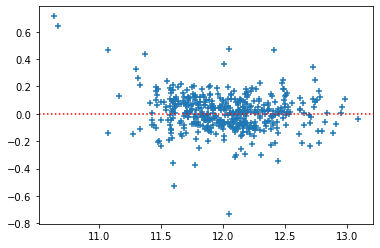

In [80]:
plt.scatter(y_pred_rfe_test,y_res2, marker='+')
plt.axhline(y=0,color ='r', linestyle =':')
plt.show()

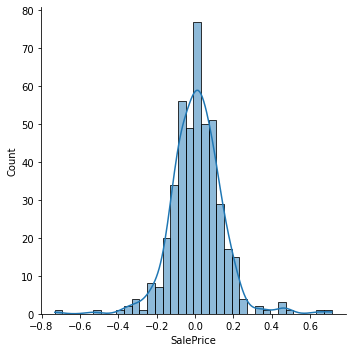

In [81]:
sns.displot(y_res2,kde=True)
plt.show()

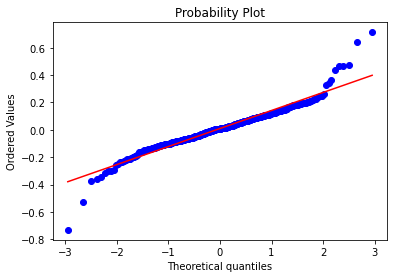

In [82]:
fig = plt.figure()
res = stats.probplot(y_res2, plot=plt)

# Lasso Regression

In [83]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}
lasso = Lasso()

# cross validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [84]:
# cv_results
cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
1,0.0002,-0.077673,-0.089015,1
0,0.0001,-0.076851,-0.089080,2
2,0.0003,-0.078683,-0.089285,3
3,0.0004,-0.079747,-0.089553,4
4,0.0005,-0.080679,-0.089560,5
5,0.001,-0.083754,-0.090550,6
6,0.002,-0.089569,-0.094590,7
7,0.003,-0.094721,-0.098682,8
8,0.004,-0.099574,-0.102953,9
9,0.005,-0.103836,-0.106678,10


In [85]:
# Printing the best hyperparameter alpha
print(lasso_model_cv.best_params_)

{'alpha': 0.0002}


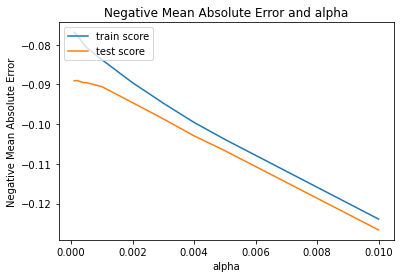

In [86]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float64')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [87]:

alpha = lasso_model_cv.best_params_['alpha']
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
print(lasso.intercept_)
print(lasso.coef_)

10.380731616355947
[-5.04156444e-02  3.10943731e-02  1.06337391e-01  5.20025710e-01
  3.17878732e-01  0.00000000e+00  1.45545036e-01  2.49151745e-02
  4.42131790e-01  1.63886199e-01  4.48734996e-01  4.10340626e-02
  9.23988965e-02  6.58017415e-02  1.05710382e-01  6.37557070e-02
  1.95929826e-01  2.39269786e-02  0.00000000e+00 -3.27062867e-02
 -6.67423328e-02  1.56597935e-02 -0.00000000e+00  1.05430407e-02
  9.74552686e-02  7.31985111e-02  4.04932085e-02  4.50605263e-02
  7.05568981e-02  3.21668909e-02  4.94274238e-02 -4.43451886e-02
 -0.00000000e+00 -1.77856531e-02  7.76075640e-03  6.79926482e-02
  3.21320627e-01  3.75424067e-01  3.18949462e-01  2.56600612e-01
 -0.00000000e+00 -2.59914196e-02  1.10551590e-02  6.83253262e-03
  2.98699152e-03  8.71882319e-02 -7.66075798e-02 -1.76622119e-02
 -4.19036391e-02 -4.51020652e-02 -2.16538737e-02 -2.64343668e-02
  0.00000000e+00 -2.61840537e-02  8.66074999e-02  1.03309010e-01
 -5.72268918e-02 -3.78548246e-02 -5.32724608e-02  0.00000000e+00
  5.87

The advantage of this technique is clearly visible here as Lasso brings the coefficients of insignificant features to zero

In [88]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train_ls = lasso.predict(X_train)
y_pred_test_ls = lasso.predict(X_test)

metric3 = []
r2_train_lr = metrics.r2_score(y_train, y_pred_train_ls)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = metrics.r2_score(y_test, y_pred_test_ls)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss_train_lr = np.sum(np.square(y_train - y_pred_train_ls))
print(rss_train_lr)
metric3.append(rss_train_lr)

rss_test_lr = np.sum(np.square(y_test - y_pred_test_ls))
print(rss_test_lr)
metric3.append(rss_test_lr)

mse_train_lr = metrics.mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = metrics.mean_squared_error(y_test, y_pred_test_ls)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

rmse_train_lr = np.sqrt(mse_train_lr)
print(rmse_train_lr)
metric3.append(rmse_train_lr)

rmse_rfe_test_lr = np.sqrt(mse_test_lr)
print(rmse_rfe_test_lr)
metric3.append(rmse_rfe_test_lr)


0.9233243888011675
0.8871913969619928
13.053511042329458
6.836131720407877
0.012599961254884162
0.01567920119359605
0.11224954901862262
0.1252166170825424


#### The R2 values for Train and Test matches well, indicating an optimum model

In [89]:
y_res3 = y_test-y_pred_test_ls

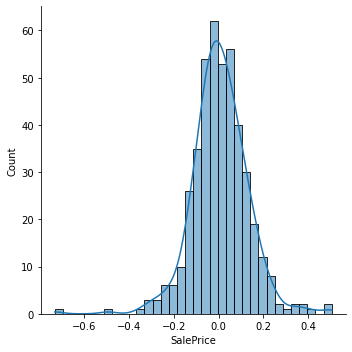

In [90]:
sns.displot(y_res3,kde=True)
plt.show()

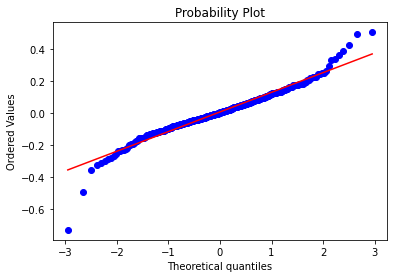

In [91]:
fig = plt.figure()
res = stats.probplot(y_res3, plot=plt)

In [92]:
lasso_cols = pd.DataFrame(index=X_test.columns)


lasso_cols['Features'] = X_test.columns
lasso_cols['Lasso_values'] = lasso.coef_

lasso_best_cols = lasso_cols[~(lasso_cols['Lasso_values']==0)]
lasso_best_cols.sort_values(by = 'Lasso_values', ascending=False ,inplace=True)
lasso_best_cols.head(10)


,Features,Lasso_values
OverallQual,OverallQual,0.520026
GrLivArea,GrLivArea,0.448735
1stFlrSF,1stFlrSF,0.442132
MSZoning_RH,MSZoning_RH,0.375424
MSZoning_FV,MSZoning_FV,0.321321
MSZoning_RL,MSZoning_RL,0.318949
OverallCond,OverallCond,0.317879
MSZoning_RM,MSZoning_RM,0.256601
GarageCars,GarageCars,0.195930
Neighborhood_StoneBr,Neighborhood_StoneBr,0.178402


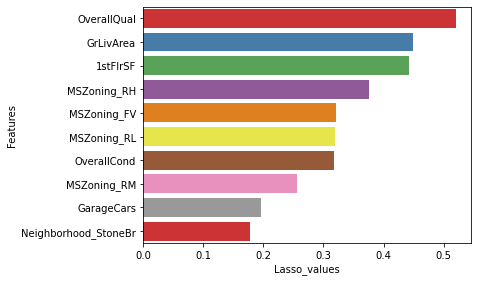

In [93]:
# bar plot to determine the variables that would affect pricing most using lasso regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Lasso_values', palette='Set1', data = lasso_best_cols.head(10))
plt.show()

# Ridge Regression

In [94]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)     

ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [95]:
# Printing the best hyperparameter alpha
print(ridge_model_cv.best_params_)

{'alpha': 1.0}


In [96]:
ridge_cv_results  = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results  = ridge_cv_results [ridge_cv_results ['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
13,1.0,-0.077866,-0.089664,1
12,0.9,-0.077746,-0.089679,2
11,0.8,-0.077622,-0.089704,3
10,0.7,-0.077497,-0.089737,4
14,2.0,-0.079078,-0.089742,5
9,0.6,-0.077367,-0.089767,6
8,0.5,-0.077227,-0.089802,7
7,0.4,-0.077081,-0.089834,8
6,0.3,-0.076919,-0.089863,9
5,0.2,-0.076734,-0.089950,10


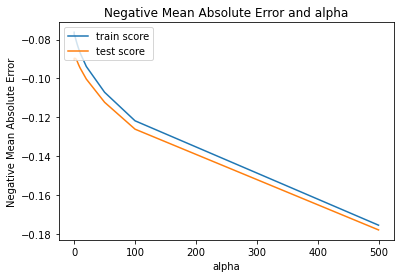

In [97]:
# plotting mean test and train scoes with alpha 
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [98]:

alpha = ridge_model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.intercept_)
print(ridge.coef_)

10.412223512650908
[-4.64517888e-02  3.95619548e-02  1.22058963e-01  4.61261948e-01
  3.09607236e-01  7.06574397e-03  1.76960193e-01  7.26840619e-02
  4.12978470e-01  1.92466237e-01  3.47703428e-01  5.38002213e-02
  1.18320500e-01  7.80626701e-02  1.22531223e-01  7.18953348e-02
  1.78063736e-01  3.62451149e-02 -3.95371962e-03 -3.29692178e-02
 -7.26474593e-02  1.43677999e-02 -4.55772304e-03  1.70243722e-02
  1.04026953e-01  7.30911027e-02  4.13148286e-02  4.96924839e-02
  7.38721441e-02  3.45041255e-02  4.60990373e-02 -5.38883426e-02
  3.31017078e-04 -1.86223501e-02  7.49953908e-03  6.55343704e-02
  2.32040736e-01  3.05877355e-01  2.49201427e-01  2.11606323e-01
 -5.04900365e-02 -7.78582550e-02 -2.74513386e-03  7.37340248e-03
 -6.23943785e-03  8.69936363e-02 -9.31645365e-02 -3.64279352e-02
 -8.66234477e-02 -9.07274036e-02 -4.29485881e-02 -3.93800789e-02
  4.18271359e-02 -4.02300112e-02  8.46383407e-02  1.06012631e-01
 -8.39538541e-02 -5.15533255e-02 -7.26346326e-02 -5.44947111e-03
  7.13

In [99]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train_rr = ridge.predict(X_train)
y_pred_test_rr = ridge.predict(X_test)

metric4 = []
r2_train_rr = metrics.r2_score(y_train, y_pred_train_rr)
print(r2_train_rr)
metric4.append(r2_train_rr)

r2_test_rr = metrics.r2_score(y_test, y_pred_test_rr)
print(r2_test_rr)
metric4.append(r2_test_rr)

rss_train_rr = np.sum(np.square(y_train - y_pred_train_rr))
print(rss_train_rr)
metric4.append(rss_train_rr)

rss_test_rr = np.sum(np.square(y_test - y_pred_test_rr))
print(rss_test_rr)
metric4.append(rss_test_rr)

mse_train_rr = metrics.mean_squared_error(y_train, y_pred_train_rr)
print(mse_train_rr)
metric4.append(mse_train_rr**0.5)

mse_test_rr = metrics.mean_squared_error(y_test, y_pred_test_rr)
print(mse_test_rr)
metric4.append(mse_test_rr**0.5)

rmse_train_rr = np.sqrt(mse_train_rr)
print(rmse_train_rr)
metric4.append(rmse_train_rr)

rmse_test_rr = np.sqrt(mse_test_lr)
print(rmse_test_rr)
metric4.append(rmse_test_rr)

0.9234903865815737
0.8856865306042504
13.025251028152137
6.927325692907223
0.012832759633647425
0.01588836168097987
0.11328177096800449
0.1252166170825424


In [100]:
y_res4 = y_test-y_pred_test_rr

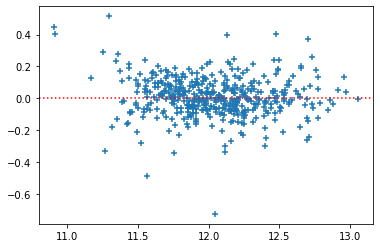

In [101]:
plt.scatter(y_pred_test_rr,y_res4, marker='+')
plt.axhline(y=0,color ='r', linestyle =':')
plt.show()

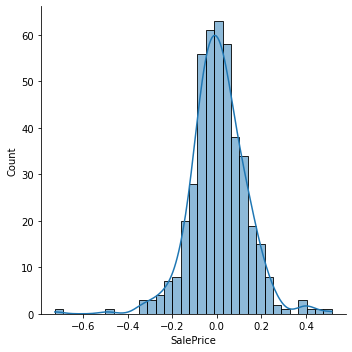

In [102]:
sns.displot(y_res4,kde=True)
plt.show()

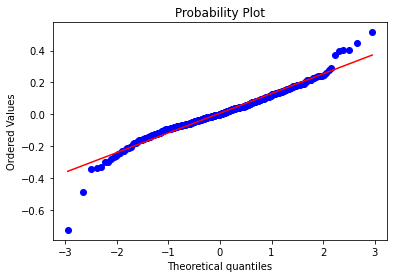

In [103]:
fig = plt.figure()
res = stats.probplot(y_res4, plot=plt)

In [104]:
ridge_cols = pd.DataFrame(index=X_test.columns)

ridge_cols['Features'] = X_test.columns
ridge_cols['Ridge_values'] = ridge.coef_

ridge_best_cols = ridge_cols[~(ridge_cols['Ridge_values']==0)]
ridge_best_cols.sort_values(by = 'Ridge_values', ascending=False ,inplace=True)
ridge_best_cols.head(10)

,Features,Ridge_values
OverallQual,OverallQual,0.461262
1stFlrSF,1stFlrSF,0.412978
GrLivArea,GrLivArea,0.347703
OverallCond,OverallCond,0.309607
MSZoning_RH,MSZoning_RH,0.305877
MSZoning_RL,MSZoning_RL,0.249201
MSZoning_FV,MSZoning_FV,0.232041
MSZoning_RM,MSZoning_RM,0.211606
2ndFlrSF,2ndFlrSF,0.192466
Neighborhood_StoneBr,Neighborhood_StoneBr,0.184531


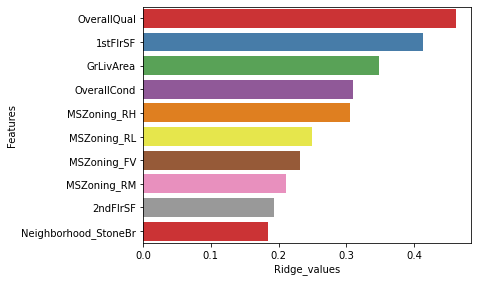

In [105]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Ridge_values', palette='Set1', data = ridge_best_cols.head(10))
plt.show()

In [106]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)','RMSE (Train)','RMSE (Test)']
        }

metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

lr_metric = pd.Series(metric1, name = 'Linear Regression')
rf_metric = pd.Series(metric2, name = 'RFE Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')
rg_metric = pd.Series(metric4, name = 'Ridge Regression')

final_metric = pd.concat([metric, lr_metric, rf_metric,  ls_metric, rg_metric], axis = 1)

final_metric

,Metric,Linear Regression,RFE Regression,Lasso Regression,Ridge Regression
0,R2 Score (Train),9.248783e-01,0.920096,0.923324,0.923490
1,R2 Score (Test),-5.060041e+24,0.866831,0.887191,0.885687
2,RSS (Train),1.278896e+01,13.603156,13.053511,13.025251
3,RSS (Test),3.066354e+26,8.069985,6.836132,6.927326
4,MSE (Train),1.122495e-01,0.115768,0.112250,0.113282
5,MSE (Test),8.386252e+11,0.136048,0.125217,0.126049
6,RMSE (Train),1.122495e-01,0.115768,0.112250,0.113282
7,RMSE (Test),8.386252e+11,0.136048,0.125217,0.125217


## Conclusion:
Normal Regression is worst model due to negative R2 score

Ridge and Lasso both have good performance over RFE. 

The optimal lambda value of Ridge and Lasso are below:
Ridge - 1
Lasso - 0.0002

The MSE of Ridge and Lasso are:

Ridge - 0.125217
Lasso - 0.126049

Also, since Lasso helps in feature reduction, Lasso has a better edge over Ridge.

Best Variables to describe according to best algorithm Lasso hence are:
    OverallQual	0.520026
    GrLivArea	0.448735
    1stFlrSF	0.442132
    MSZoning_RH	0.375424
    MSZoning_FV	0.321321
    MSZoning_RL	0.318949
    OverallCond	0.317879
    MSZoning_RM	0.256601
    GarageCars	0.195930
    Neighborhood_StoneBr	0.178402


# Subjective Questions


#### Q1. What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

#### Ridge doubling the alpha

In [107]:

alpha = ridge_model_cv.best_params_['alpha']*2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.intercept_)
print(ridge.coef_)

10.523591992177394
[-4.30921756e-02  4.84757099e-02  1.10975715e-01  4.30156798e-01
  2.89843475e-01  1.73486150e-02  1.79739496e-01  8.02021693e-02
  3.72490414e-01  1.80160324e-01  3.26685228e-01  5.49951429e-02
  1.34021220e-01  8.15473691e-02  1.29744688e-01  7.29812272e-02
  1.75055758e-01  3.96673365e-02 -9.30768891e-04 -3.27207557e-02
 -7.87013555e-02  1.25909878e-02 -7.58832191e-03  3.29089291e-02
  9.91336363e-02  7.59361761e-02  4.23330841e-02  5.12669831e-02
  8.05468347e-02  4.13493827e-02  4.60218621e-02 -5.52493803e-02
  3.80961027e-04 -2.00843723e-02  6.48119814e-03  6.72181102e-02
  1.54388747e-01  2.16384494e-01  1.77493418e-01  1.39219707e-01
 -3.43077451e-02 -6.39268097e-02  2.30863109e-03  1.04926980e-02
 -6.47407709e-03  9.17514154e-02 -8.83492877e-02 -3.94707120e-02
 -9.33945063e-02 -8.74669714e-02 -3.70380803e-02 -3.14804261e-02
  3.80484357e-02 -3.25994157e-02  8.79840484e-02  1.03214978e-01
 -7.54321917e-02 -4.10167905e-02 -6.66441089e-02 -1.35104947e-03
  7.34

In [108]:
y_pred_train_rr2 = ridge.predict(X_train)
y_pred_test_rr2 = ridge.predict(X_test)

metric5 = []
r2_train_rr2 = metrics.r2_score(y_train, y_pred_train_rr2)
print(r2_train_rr2)
metric5.append(r2_train_rr2)

r2_test_rr2 = metrics.r2_score(y_test, y_pred_test_rr2)
print(r2_test_rr2)
metric5.append(r2_test_rr2)

rss_train_rr2 = np.sum(np.square(y_train - y_pred_train_rr2))
print(rss_train_rr2)
metric5.append(rss_train_rr2)

rss_test_rr2 = np.sum(np.square(y_test - y_pred_test_rr2))
print(rss_test_rr2)
metric5.append(rss_test_rr2)

mse_train_rr2 = metrics.mean_squared_error(y_train, y_pred_train_rr2)
print(mse_train_rr2)
metric5.append(mse_train_rr2**0.5)

mse_test_rr2 = metrics.mean_squared_error(y_test, y_pred_test_rr2)
print(mse_test_rr2)
metric5.append(mse_test_rr2**0.5)

rmse_train_rr2 = np.sqrt(mse_train_rr2)
print(rmse_train_rr2)
metric5.append(rmse_train_rr2)

rmse_test_rr2 = np.sqrt(mse_test_lr)
print(rmse_test_rr2)
metric5.append(mse_test_rr2)

0.9213324800157405
0.886839313231061
13.392620218237534
6.8574677772018005
0.01319469972240151
0.015728137103673854
0.11486818411728075
0.1252166170825424


In [109]:
ridge_cols2 = pd.DataFrame(index=X_test.columns)

ridge_cols2['Features'] = X_test.columns
ridge_cols2['Ridge_values'] = ridge.coef_

ridge_best_cols2 = ridge_cols2[~(ridge_cols2['Ridge_values']==0)]
ridge_best_cols2.sort_values(by = 'Ridge_values', ascending=False ,inplace=True)
ridge_best_cols2.head(10)

,Features,Ridge_values
OverallQual,OverallQual,0.430157
1stFlrSF,1stFlrSF,0.372490
GrLivArea,GrLivArea,0.326685
OverallCond,OverallCond,0.289843
MSZoning_RH,MSZoning_RH,0.216384
2ndFlrSF,2ndFlrSF,0.180160
BsmtFinSF1,BsmtFinSF1,0.179739
MSZoning_RL,MSZoning_RL,0.177493
Neighborhood_StoneBr,Neighborhood_StoneBr,0.175155
GarageCars,GarageCars,0.175056


#### Lasso Doubling alpha values

In [110]:
alpha = lasso_model_cv.best_params_['alpha']*2
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
print(lasso.intercept_)
print(lasso.coef_)

10.543908605339999
[-4.58088951e-02  1.92489720e-02  8.57342772e-02  5.44344406e-01
  3.12768419e-01  0.00000000e+00  1.34156078e-01  4.87936019e-03
  2.34929247e-01  0.00000000e+00  7.64058456e-01  3.57876358e-02
  1.00586436e-01  6.76301839e-02  9.97399003e-02  6.08314227e-02
  1.95243888e-01  1.97302381e-02 -0.00000000e+00 -3.39665176e-02
 -7.06933748e-02  1.22356954e-02 -0.00000000e+00  1.71684810e-02
  9.62604102e-02  7.78766814e-02  4.11427979e-02  4.54511644e-02
  7.14850599e-02  3.77960202e-02  4.85771685e-02 -4.68044181e-02
 -4.10550488e-04 -1.71407822e-02  7.55591167e-03  7.28656861e-02
  1.45780105e-01  1.74221226e-01  1.50340270e-01  8.31035951e-02
 -0.00000000e+00 -0.00000000e+00  1.40236218e-02  5.23395475e-03
  2.88130857e-03  8.39241609e-02 -6.66837760e-02 -1.16990009e-02
 -5.64558464e-02 -2.83719951e-02 -5.39303045e-03 -1.02942977e-02
  0.00000000e+00 -1.07269550e-02  8.49197730e-02  9.56414907e-02
 -4.42007825e-02 -2.21735560e-02 -3.62390406e-02  0.00000000e+00
  5.83

In [111]:
y_pred_train_ls2 = lasso.predict(X_train)
y_pred_test_ls2 = lasso.predict(X_test)

metric6 = []
r2_train_lr2 = metrics.r2_score(y_train, y_pred_train_ls2)
print(r2_train_lr2)
metric6.append(r2_train_lr2)

r2_test_lr2 = metrics.r2_score(y_test, y_pred_test_ls2)
print(r2_test_lr2)
metric6.append(r2_test_lr2)

rss_train_lr2 = np.sum(np.square(y_train - y_pred_train_ls2))
print(rss_train_lr2)
metric6.append(rss_train_lr2)

rss_test_lr2 = np.sum(np.square(y_test - y_pred_test_ls2))
print(rss_test_lr2)
metric6.append(rss_test_lr2)

mse_train_lr2 = metrics.mean_squared_error(y_train, y_pred_train_ls2)
print(mse_train_lr2)
metric6.append(mse_train_lr2**0.5)

mse_test_lr2 = metrics.mean_squared_error(y_test, y_pred_test_ls2)
print(mse_test_lr2)
metric6.append(mse_test_lr2**0.5)

rmse_train_lr2 = np.sqrt(mse_train_lr2)
print(rmse_train_lr2)
metric6.append(rmse_train_lr2)

rmse_rfe_test_lr2 = np.sqrt(mse_test_lr2)
print(rmse_rfe_test_lr2)
metric6.append(rmse_rfe_test_lr2)

0.9185399641348413
0.8906710441345489
13.868027408571807
6.625267249334481
0.01366308119071114
0.015195567085629543
0.11688918337772379
0.1232703009067048


In [112]:
lasso_cols2 = pd.DataFrame(index=X_test.columns)


lasso_cols2['Features'] = X_test.columns
lasso_cols2['Lasso_values'] = lasso.coef_

lasso_best_cols2 = lasso_cols2[~(lasso_cols2['Lasso_values']==0)]
lasso_best_cols2.sort_values(by = 'Lasso_values', ascending=False ,inplace=True)
lasso_best_cols2.head(10)

,Features,Lasso_values
GrLivArea,GrLivArea,0.764058
OverallQual,OverallQual,0.544344
OverallCond,OverallCond,0.312768
1stFlrSF,1stFlrSF,0.234929
GarageCars,GarageCars,0.195244
MSZoning_RH,MSZoning_RH,0.174221
Neighborhood_StoneBr,Neighborhood_StoneBr,0.159521
MSZoning_RL,MSZoning_RL,0.150340
MSZoning_FV,MSZoning_FV,0.145780
BsmtFinSF1,BsmtFinSF1,0.134156


In [113]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)','RMSE (Train)','RMSE (Test)']
        }

metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

ls_metric = pd.Series(metric3, name = 'Lasso Regression')
rg_metric = pd.Series(metric4, name = 'Ridge Regression')
ls_metric2 = pd.Series(metric5, name = 'Lasso Regression 2')
rg_metric2 = pd.Series(metric6, name = 'Ridge Regression 2')

final_metric = pd.concat([metric, ls_metric, rg_metric, ls_metric2, rg_metric2], axis = 1)

final_metric

,Metric,Lasso Regression,Ridge Regression,Lasso Regression 2,Ridge Regression 2
0,R2 Score (Train),0.923324,0.923490,0.921332,0.918540
1,R2 Score (Test),0.887191,0.885687,0.886839,0.890671
2,RSS (Train),13.053511,13.025251,13.392620,13.868027
3,RSS (Test),6.836132,6.927326,6.857468,6.625267
4,MSE (Train),0.112250,0.113282,0.114868,0.116889
5,MSE (Test),0.125217,0.126049,0.125412,0.123270
6,RMSE (Train),0.112250,0.113282,0.114868,0.116889
7,RMSE (Test),0.125217,0.125217,0.015728,0.123270


#### Answer:
    Ridge: R2 score for train is decreased little and R2 score for test is increased little. 
           OverallQual and 1stFlrSF are the top two feature in both cases with little coeff value decreased.
    Lasso: Both R2 for train and test is almost same after doubling alpha
           GrLivArea become the top variable over OverallQual after doubling alpha with coeff increase significantly.
   

#### Q3. After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [114]:
## Create a list of top 5 lasso predictors that are to be removed
top5 = ['OverallQual', 'GrLivArea', '1stFlrSF', 'MSZoning_RH', 'MSZoning_FV']

In [115]:
X_train_sub = X_train.drop(columns=top5)
X_test_sub = X_test.drop(columns=top5)

In [116]:
alpha = lasso_model_cv.best_params_['alpha']
lasso = Lasso(alpha=alpha)

lasso.fit(X_train_sub, y_train)
print(lasso.intercept_)
print(lasso.coef_)

10.740281661445788
[-0.05999997  0.08985041  0.13972026  0.34952292  0.02567869  0.43935388
  0.34597513  0.26054208  0.07539893  0.2546175   0.09580372  0.21336298
  0.12376198  0.25280676  0.0622703   0.00551798 -0.03395407 -0.10278274
  0.00704874 -0.00383386  0.11644974  0.09305227  0.09523032  0.02080516
  0.0580894   0.10482766  0.06260727  0.05637733 -0.03767305  0.00750819
 -0.01270347  0.00906551  0.05478479  0.06550668  0.04801741 -0.
 -0.00881321 -0.          0.          0.          0.10975865 -0.086918
 -0.05596807 -0.13912405 -0.13515097 -0.02484791 -0.01308105  0.
 -0.00984143  0.12783322  0.13748107 -0.07903957 -0.         -0.06421596
  0.02620519  0.12729993  0.24515532  0.01714296  0.0608181  -0.02295236
 -0.08091648  0.01614656  0.01049196  0.          0.04774461 -0.21697763
  0.07925338  0.         -0.         -0.01140553  0.          0.
 -0.          0.14380824  0.04419167  0.          0.         -0.00094027
  0.00283608 -0.         -0.0083249   0.          0.002241

In [117]:
y_pred_train_ls3 = lasso.predict(X_train_sub)
y_pred_test_ls3 = lasso.predict(X_test_sub)

metric6 = []
r2_train_lr3 = metrics.r2_score(y_train, y_pred_train_ls3)
print(r2_train_lr3)
metric6.append(r2_train_lr3)

r2_test_lr3 = metrics.r2_score(y_test, y_pred_test_ls3)
print(r2_test_lr3)
metric6.append(r2_test_lr3)

rss_train_lr3 = np.sum(np.square(y_train - y_pred_train_ls3))
print(rss_train_lr3)
metric6.append(rss_train_lr3)

rss_test_lr3= np.sum(np.square(y_test - y_pred_test_ls3))
print(rss_test_lr3)
metric6.append(rss_test_lr3)

mse_train_lr3 = metrics.mean_squared_error(y_train, y_pred_train_ls3)
print(mse_train_lr3)
metric6.append(mse_train_lr3**0.5)

mse_test_lr3 = metrics.mean_squared_error(y_test, y_pred_test_ls3)
print(mse_test_lr3)
metric6.append(mse_test_lr3**0.5)

rmse_train_lr3 = np.sqrt(mse_train_lr3)
print(rmse_train_lr3)
metric6.append(rmse_train_lr3)

rmse_rfe_test_lr3 = np.sqrt(mse_test_lr3)
print(rmse_rfe_test_lr3)
metric6.append(rmse_rfe_test_lr3)

0.8973775909031606
0.855474972387147
17.470780204963564
8.75812747476517
0.01721259133493947
0.02008744833661736
0.13119676571828848
0.14173019557108274


In [118]:
lasso_cols3 = pd.DataFrame(index=X_test_sub.columns)


lasso_cols3['Features'] = X_test_sub.columns
lasso_cols3['Lasso_values'] = lasso.coef_

lasso_best_cols3 = lasso_cols3[~(lasso_cols3['Lasso_values']==0)]
lasso_best_cols3.sort_values(by = 'Lasso_values', ascending=False ,inplace=True)
lasso_best_cols3.head(10)

,Features,Lasso_values
BsmtFinSF1,BsmtFinSF1,0.439354
OverallCond,OverallCond,0.349523
BsmtUnfSF,BsmtUnfSF,0.345975
2ndFlrSF,2ndFlrSF,0.260542
FullBath,FullBath,0.254618
GarageCars,GarageCars,0.252807
Neighborhood_StoneBr,Neighborhood_StoneBr,0.245155
BedroomAbvGr,BedroomAbvGr,0.213363
Exterior1st_Stone,Exterior1st_Stone,0.143808
LotArea,LotArea,0.139720


#### Answer:
Next 5 features if first five are dropped: BsmtFinSF1, OverallCond, BsmtUnfSF, 2ndFlrSF, FullBath